# Smart TV Privacy Analysis

In this assignment, we will analyze real traces collected from Roku TV and Amazon FireTV to learn more about the behavior of TV channels and whether there's any privacy concern.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

First, let's read in the data. Given the large size, all data files are stored as "pickles" (https://docs.python.org/3/library/pickle.html) to save space. 

We have four files here: two files for Roku and two files for Amazon FireTV, where "vanilla" corresponds to the default configuration, and "limitad" corresponds to having the "limit ad tracking" option turned on. 

All four files contain HTTP response traffic.

In [2]:
# Roku data
roku_limitad = pd.read_pickle("roku-data-limitad_http_resp.pickle")
roku_vanilla = pd.read_pickle("roku-data_http_resp.pickle")

# Amazon data
amzn_limitad = pd.read_pickle("amazon-data-limitad_http_resp.pickle")
amzn_vanilla = pd.read_pickle("amazon-data_http_resp.pickle")

Let's see how many records we have in each file.

In [3]:
# Roku: number of records
print("Roku:", len(roku_vanilla), len(roku_limitad))

# Amazon: number of records
print("Amazon:", len(amzn_vanilla), len(amzn_limitad))

Roku: 4279 3984
Amazon: 8695 8124


Now, let's take a closer look at the data. The pickle file is read into a "dataframe" (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). You can think of it as a SQL table or spreasheet with columns and rows.

For example, let's check out the first five rows in "roku_vanilla".

In [4]:
roku_vanilla.head(5)

,channel_id,data,time,body,location,code,set_cookie,user_agent,ip_src,tcp_srcport,tcp_stream,http2,host_by_dns,domain_by_dns,channel_name,rank,category,status,playback
0,13,01d27b2269223a2263613036333836342d333432612d34...,1556908916.319217000,,,,,,54.175.224.52,2350,17,False,,,Prime Video,3,Movies & TV,TERMINATED,False
1,13,,1556908947.886910000,ï¿½PNG\r\n\n,,200,,,54.230.51.79,80,62,False,g-ecx.images-amazon.com,images-amazon.com,Prime Video,3,Movies & TV,TERMINATED,False
2,13,,1556908964.537949000,ï¿½PNG\r\n\n,,200,,,54.230.51.130,80,96,False,g-ecx.images-amazon.com,images-amazon.com,Prime Video,3,Movies & TV,TERMINATED,False
3,13,,1556909007.422930000,ï¿½PNG\r\n\n,,200,,,54.230.51.79,80,146,False,g-ecx.images-amazon.com,images-amazon.com,Prime Video,3,Movies & TV,TERMINATED,False
4,13,,1556909041.443910000,ï¿½PNG\r\n\n,,200,,,54.230.51.130,80,193,False,g-ecx.images-amazon.com,images-amazon.com,Prime Video,3,Movies & TV,TERMINATED,False


We can see that all five records come from the same channel (channel_id = 13), which is "Prime Video" (channel_name). 

In all five HTTP response records, the channel queries "images-amazon.com" domain (domain_by_dns). 

# Part 1: analyze/compare popular domains

First, let's find out what are the most popular domains.

Complete the following "get_popular_domains" function that outputs the **top five domains** that are queried by the most number of **distinct channels**. \
For each domain, output the number of distinct channels that queried it. 

For example: \
domain1, num_distinct_channels \
domain2, num_distinct_channels \
...

Hint: use the **domain_by_dns** column to extract domain, and the **channel_id** column to extract distinct/unique channel.

Note: there may be empty values in domain_by_dns. You should **exclude** the empty value in your answer.

You can either show the output by using "print", or output the table format like above.

In [5]:
def get_popular_domains(df):
    df1 = df[df.domain_by_dns != '']
    both = df1[['channel_id', 'domain_by_dns']].drop_duplicates()
    output = both[['domain_by_dns']].value_counts().reset_index(name='num_distinct_channels')
    print(output.head(5))
    return



Now, let's run it and get the top five domains from each file (roku/amazon + vanilla/limitads)

In [6]:
# Roku vanilla total 77
get_popular_domains(roku_vanilla)

           domain_by_dns  num_distinct_channels
0               roku.com                     29
1               ifood.tv                     14
2  scorecardresearch.com                     13
3             demdex.net                     11
4        doubleclick.net                     10


In [7]:
# Roku w/ limit ads option total 75
get_popular_domains(roku_limitad)

           domain_by_dns  num_distinct_channels
0               roku.com                     26
1  scorecardresearch.com                     15
2               ifood.tv                     14
3             demdex.net                     12
4                 1rx.io                      8


In [8]:
# Amazon vanilla total 190
get_popular_domains(amzn_vanilla)

         domain_by_dns  num_distinct_channels
0           amazon.com                     81
1      crashlytics.com                     31
2       amazon-dss.com                     30
3  amazon-adsystem.com                     27
4      doubleclick.net                     21


In [9]:
# Amazon w/ limit ads option total 164
get_popular_domains(amzn_limitad)

           domain_by_dns  num_distinct_channels
0             amazon.com                     76
1        crashlytics.com                     31
2         amazon-dss.com                     20
3    app-measurement.com                     19
4  scorecardresearch.com                     18


## Question 1: Describe what you observe from the above results. Do you think the "limit ads" option reduce the number of channels that queried domains on Roku and Amazon FireTV? Why or why not?

Your answer here: For both Roku and Amazon FireTV, the "limit ads" option DOES reduce the total number of channels that queried domains. However, the reduction is not evenly distributed, and there may be some domains that are queried by more channels with the "limit ads" option than without it, such as "doubleclick.net" on Roku. Overall, there are some domains that are queried by more channels with the "limit ads" option, but generally, limiting ads reduces the number of channels that queried the domain.

# Part 2: analyze/compare channels

Now, let's take a look at the channels. We want to find out which channels queried the most number of distinct domains. 

Complete the following "get_channels_with_most_domains" function that outputs the **top five channel names** that queried the most number of **distinct domains**. \
For each channel name, output its channel category and the number of distinct domains it queried.

For example: \
channel1, category, num_distinct_domains \
channel2, category, num_distinct_domains \
...

Hint: use the **channel_name** column to extract channel name, and the **category** column to extract channel category.

You can either show the output by using "print", or output the table format.

In [10]:
def get_channels_with_most_domains(df, head=5):
    df1 = df[df.domain_by_dns != '']
    both = df1[['channel_name', 'category', 'domain_by_dns']].drop_duplicates()
    #print(both)
    output = both[['channel_name', 'category']].value_counts().reset_index(name='num_distinct_domains')
    print(output.head(5))
    return

Now, let's run it and get the top five channels from each file (roku/amazon + vanilla/limitads)

In [11]:
# Roku vanilla total 58
get_channels_with_most_domains(roku_vanilla)

       channel_name          category  num_distinct_domains
0   CopyKat Recipes              Food                    17
1          NBC News    News & Weather                    15
2             CNNgo    News & Weather                     9
3  Models In Motion  Special Interest                     9
4       Nickelodeon     Kids & Family                     8


In [12]:
# Roku w/ limit ads option total 65
get_channels_with_most_domains(roku_limitad)

  channel_name          category  num_distinct_domains
0  Sexy Shorts  Special Interest                    22
1     NBC News    News & Weather                    16
2   NBC Sports            Sports                    10
3          NBA            Sports                     9
4  Nickelodeon     Kids & Family                     8


In [13]:
# Amazon vanilla total 128
get_channels_with_most_domains(amzn_vanilla)

                                        channel_name     category  \
0  CuriosityStream - Watch Documentaries Online (TV)      Medical   
1                                  The CW on Fire TV  Movies & TV   
2                                 CBS News - Fire TV         News   
3                                           NBC News         News   
4                                                NBC  Movies & TV   

   num_distinct_domains  
0                    40  
1                    24  
2                    23  
3                    21  
4                    20  


In [14]:
# Amazon w/ limit ads option total 124
get_channels_with_most_domains(amzn_limitad)

                                        channel_name     category  \
0  CuriosityStream - Watch Documentaries Online (TV)      Medical   
1                                                NBC  Movies & TV   
2                                  The CW on Fire TV  Movies & TV   
3                                 CBS News - Fire TV         News   
4                 CBS Sports Stream &amp; Watch Live       Sports   

   num_distinct_domains  
0                    40  
1                    27  
2                    20  
3                    19  
4                    18  


## Question 2: Describe what you observe from the above results. Do you think the "limit ads" option reduce the number of domains queried by channels on Roku and Amazon FireTV? Why or why not?

Your answer here: For Roku, the "limit ads" option actually increases the total number of domains queried by the top 5 channels, while for Amazon FireTV, the total number of domains queried decreases slightly. For both, there are several channels that query more domains with the "limit ads" option than without it. This likely means that, while the total number of ads are reduced, some channels get more ads with the "limit ads" option. Its possible that this is because Roku and Amazon FireTV have to make up for profits lost by reducing ads.

# Part 3: analyze "data leak"

Finally, let's take a deeper look into which data is being collected by the channels. We call it "data leak". Every channel may collect different information about the user, e.g., device information and geolocation.

Here, we need to use new pickle files with the "data leak" information. Let's load the data. 

In [15]:
# Roku data
roku_limitad_leak = pd.read_pickle("roku-data-limitad_leak.pickle")
roku_vanilla_leak = pd.read_pickle("roku-data_leak.pickle")

# Amazon data
amzn_limitad_leak = pd.read_pickle("amazon-data-limitad_leak.pickle")
amzn_vanilla_leak = pd.read_pickle("amazon-data_leak.pickle")

Same as before, the data is being stored in dataframe format. 

We will focus on the **id_type** column here. This column indicates *what type of data is being collected and sent by the channel*. \
Let's see what's in the **id_type**.

In [16]:
list(roku_vanilla_leak.id_type.unique())

['Channel name', 'AD ID', 'Build Number', 'Serial No', 'Zip', 'City']

Note that the **id_type** is a bit different in Amazon.

In [17]:
list(amzn_vanilla_leak.id_type.unique())

['Android ID',
 'Channel name',
 'AD ID',
 'Serial No',
 'Device name',
 'Zip',
 'MAC',
 'City']

Now, for each of the **id_type** above, we want to know: 
* How many times it's leaked (i.e., the number of records that have this id_type)
* How many channels leak this data (i.e., the number of distinct channels that have this id_type)

Complete the following "analyze_data_leak" function that does the above. It should output the number of leaks and the number of channels for each **id_type**.

For example: \
id_type_1, num_leaks, num_channels \
id_type_2, num_leaks, num_channels \
...

You can either show the output by using "print", or output the table format.

In [18]:
def analyze_data_leak(leak_df):
    df1 = leak_df[leak_df.id_type != '']
    print(df1[['id_type']].value_counts().reset_index(name='num_leaks'))
    channels = df1[['id_type', 'channel_name']].drop_duplicates()
    print(channels[['id_type']].value_counts().reset_index(name='num_channels'))
    return

Now, let's run it and find out the data leaks from each file (roku/amazon + vanilla/limitads)

In [19]:
# Roku vanilla total 3108
analyze_data_leak(roku_vanilla_leak)

        id_type  num_leaks
0  Channel name       1747
1         AD ID        655
2  Build Number        450
3     Serial No        246
4           Zip          8
5          City          2
        id_type  num_channels
0  Build Number            34
1         AD ID            30
2  Channel name            25
3     Serial No            14
4          City             2
5           Zip             1


In [20]:
# Roku w/ limit ads option total 2207
analyze_data_leak(roku_limitad_leak)

        id_type  num_leaks
0  Channel name       1555
1  Build Number        394
2     Serial No        213
3           Zip         22
4          City         16
5         State          7
        id_type  num_channels
0  Build Number            34
1  Channel name            26
2     Serial No            13
3          City             3
4           Zip             2
5         State             1


In [21]:
# Amazon vanilla total 2897
analyze_data_leak(amzn_vanilla_leak)

        id_type  num_leaks
0  Channel name       1437
1    Android ID        923
2         AD ID        269
3     Serial No        201
4           MAC         26
5           Zip         21
6          City         12
7   Device name          8
        id_type  num_channels
0    Android ID            69
1         AD ID            35
2     Serial No            33
3  Channel name            20
4   Device name             4
5           MAC             3
6           Zip             2
7          City             1


In [22]:
# Amazon w/ limit ads option total 2885
analyze_data_leak(amzn_limitad_leak)

        id_type  num_leaks
0  Channel name       1419
1    Android ID       1000
2         AD ID        218
3     Serial No        161
4           MAC         30
5           Zip         28
6          City         24
7   Device name          5
        id_type  num_channels
0    Android ID            65
1     Serial No            24
2  Channel name            20
3         AD ID            16
4           MAC             3
5   Device name             2
6           Zip             2
7          City             1


## Question 3: Describe what you observe from the above results. Does the "limit ads" option reduce or eliminate "data leaks"? If so, what's the degree of reduction? Please discuss Roku and Amazon FireTV separately. 

Your answer here: From the results, it appears that limiting ads on Roku significantly reduces the number of data leaks, specifically by about one third. The number of data leaks from AD ID is particularly reduced. This makes sense because limiting ads likely reduces how many IDs could potentially be leaked. 

On the other hand, limiting ads on Amazon FireTV only reduces the number of leaks by 12, which is a tiny fraction of the original number of leaks. This is interesting on contrast with how much limiting ads on Roku drastically reduced the totaly number of leaks.

# Part 4: Infer User Behavior
Basic idea: the user access different channels at different timestamp. Assume that we could infer the channel type from the channel name such as news related channel, we could infer the users'behaviors such as what time is the user reading news?

For example, we define that a channel is news related channel if its channel name contains string "news".

In [23]:
amzn_vanilla.loc[amzn_vanilla['channel_name'].str.contains("news", case = False) == True]['channel_name'].unique()

array(['Fox News', 'NBC News', 'CBS News - Fire TV', 'ABC News',
       'BBC News for Fire TV', 'One America News Network',
       'Newsy - Fire TV'], dtype=object)

Complete the following "user_behavior_infer" function that outputs the top ten time minutes that users access the specific type of channels with most times. The related channels are defined by their channel name containing some specific pattern string (**case insensitive**). Just like the "news" related channel example above. when calculating the counts of "news" related channels, it should include all of the requests from channels listed above.

The output should like this: <br>
time_stamp_minute1, access_counts1 <br>
time_stamp_minute2, access_counts2  <br>

For example, "2019-05-11 11:02:00, 100". <br>
You can either use "print" to display the above output, or use the table format instead.

**Notes: the value in time column of the dataset is based on unit of "second", you should change its format to standard time format like "year-month-day hour: minute: second" first before calcuation. The output format for the time_stamp_minutes should also be based on the standard time format.**  

Hint: you can use the **to_datetime** function in pandas to do this.

In [24]:
def user_behavior_infer(pattern, http_data):
    http_data['time'] = pd.to_datetime(http_data['time'], unit='s').round('min')
    df = http_data[http_data['channel_name'].str.contains("news", case = False) == True]
    df1 = df[['time']].value_counts().reset_index(name='access_counts')
    print(df1.head(10))
    
    x = df1.time
    y = df1.access_counts
    plt.scatter(x, y)
    
    return

                 time  access_counts
0 2019-05-11 07:12:00            157
1 2019-05-11 07:11:00            132
2 2019-05-11 01:40:00            126
3 2019-05-11 05:59:00             89
4 2019-05-11 07:10:00             89
5 2019-05-11 01:29:00             61
6 2019-05-11 05:56:00             57
7 2019-05-11 01:41:00             54
8 2019-05-11 08:35:00             34
9 2019-05-11 05:55:00             30


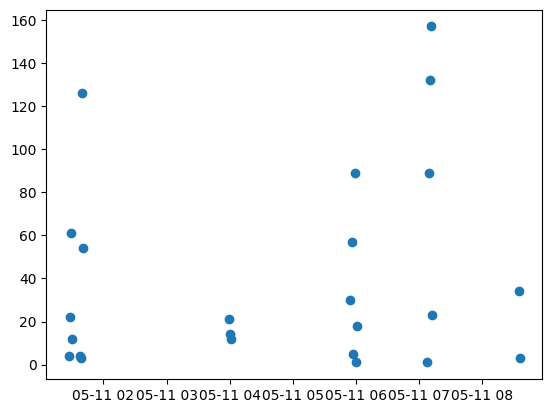

In [25]:
# Amazon vanilla
user_behavior_infer("news", amzn_vanilla)

                 time  access_counts
0 2019-05-03 18:32:00             77
1 2019-05-03 18:39:00             63
2 2019-05-03 21:11:00             55
3 2019-05-03 18:31:00             52
4 2019-05-03 20:34:00             37
5 2019-05-03 19:53:00             36
6 2019-05-03 19:52:00             27
7 2019-05-03 20:33:00             12
8 2019-05-03 20:32:00             11
9 2019-05-03 18:34:00             10


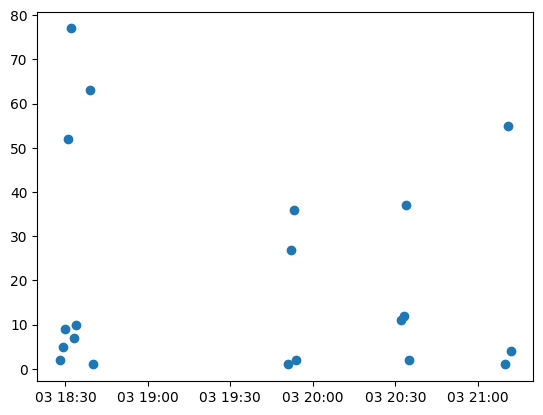

In [26]:
# Roku vanilla
user_behavior_infer("news", roku_vanilla)

**Besides the top ten minutes with most access counts, please plot the traffic figure describing the access counts at different timestamp based on per minute.The x-axis of the figure is timestamp based on per minitue. The y-axis of the figure represents the access counts in one minute.**

Note: Since you have already retrieved the timestamps in the "user_behavior_infer" function before sorting for the top ten, you can directly add/implement code to plot the figure in the "user_behavior_infer" function. If you do so, when the function is called, it will not only output the top ten timestamp with largest amount of traffic, but also plot the figure of the traffic pattern. Alternatively, you can implement/call the plot function separately in the space below.

## Question 4: Describe what you observe from the above results. Could you infer some behavior or life style information about the user? Please discuss Amazon and Roku TV seperately.

You answer here: For Roku, it looks like the majority of traffic is from 6am to 8am, with the all time peak just after 7am. However, the second largest peak in traffic occurs between 1am and 2am, when late night shows air. Based on this information, Roku TV users are either night owls who watch late night television, or early risers who watch the morning news.

For Amazon FireTV, there is a peak in traffic at around 6:30pm, as well as steady traffic from just before 8pm to 9pm. There is also a slight increase in traffic after 9pm. From this information, a large amount of Amazon FireTV users watch TV around dinner time, and many watch tv at the end of the day before bed. 